In [ ]:
# https://keras.io/api/applications/

## Classify ImageNet classes with ResNet50

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


/home/scar3crow/Dropbox/WorkStation-Subrata/python/venv1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/scar3crow/Dropbox/WorkStation-Subrata/python/venv1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/scar3crow/Dropbox/WorkStation-Subrata/python/venv1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

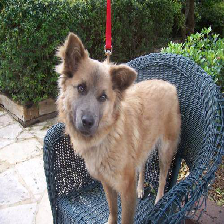

In [2]:
img_path = '/home/scar3crow/Downloads/train/dog.682.jpg'

img = image.load_img(img_path, target_size=(224, 224))

img

In [3]:
model = ResNet50(weights='imagenet')

In [4]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('=======================================')

preds = model.predict(x)


In [5]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02106662', 'German_shepherd', 0.79198104), ('n02115641', 'dingo', 0.04575007), ('n02105162', 'malinois', 0.04253024)]


In [6]:
img_path = '/home/scar3crow/Downloads/train/cat.2.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('=======================================')

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123045', 'tabby', 0.83713305), ('n02123159', 'tiger_cat', 0.07408222), ('n02124075', 'Egyptian_cat', 0.05979768)]


In [7]:
img_path = '/home/scar3crow/Downloads/train/cat.3.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('=======================================')

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123597', 'Siamese_cat', 0.14246655), ('n03223299', 'doormat', 0.13215183), ('n02124075', 'Egyptian_cat', 0.09232189)]


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16

In [10]:
model_1 = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 195s 0us/step


In [12]:
img_path = '/home/scar3crow/Downloads/train/cat.3.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('=======================================')

preds = model_1.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123597', 'Siamese_cat', 0.3093417), ('n01877812', 'wallaby', 0.080341265), ('n02326432', 'hare', 0.075098485)]


In [24]:
import os
import random
import cv2

## Now let us resize the images to one single size. For resizing : 1st dim is width(column) & nd dim is height(row)

# For cat/dog images:
nrows = 150
ncolumns = 150
channels = 3 ## for only color images


# For cat/dog images where labels i.e. 'y' is to be created and learning will be done in colour :

def read_and_process_image(list_of_images):
    X = []  # images for training
    y = []  # labels for training
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC ))
        
        if 'dog' in image:
            y.append(1)
        if 'cat' in image:
            y.append(0)
    return X, y


In [25]:
## Loading images downloaded from Kaggle as 'train.zip'

train_dir = '/home/scar3crow/Downloads/train'

train_dogs = ['/home/scar3crow/Downloads/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i]
train_cats = ['/home/scar3crow/Downloads/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]

train_images = train_dogs[:500] + train_cats[:500]  ## Slice dataset and use 2000 in each class i.e. dog & cat

random.shuffle(train_images)  ## random shuffle of the images

## Actual resizing and creating training images and labels :

X, y = read_and_process_image(train_images)


In [31]:
model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150,3))

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [32]:
import tensorflow
from keras import layers
from keras import models
from keras import optimizers

model_3 = tensorflow.keras.Sequential()
model_3.add(model_2)
model_3.add(tensorflow.keras.layers.Flatten())
model_3.add(tensorflow.keras.layers.Dense(256, activation='relu'))
model_3.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))  # Sigmoid function for just two classes

In [33]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_4 = VGG16(weights = 'imagenet') 

In [25]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
from keras.applications import InceptionResNetV2

model_5 = InceptionResNetV2(weights = 'imagenet')

In [27]:
model_5.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [34]:
model_6 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150, 150,3))

In [35]:
model_6.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_407 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_407 (BatchN (None, 74, 74, 32)   96          conv2d_407[0][0]                 
__________________________________________________________________________________________________
activation_407 (Activation)     (None, 74, 74, 32)   0           batch_normalization_407[0][0]    
__________________________________________________________________________________________________
conv2d_408

activation_607 (Activation)     (None, 3, 3, 192)    0           batch_normalization_607[0][0]    
__________________________________________________________________________________________________
conv2d_608 (Conv2D)             (None, 3, 3, 224)    129024      activation_607[0][0]             
__________________________________________________________________________________________________
batch_normalization_608 (BatchN (None, 3, 3, 224)    672         conv2d_608[0][0]                 
__________________________________________________________________________________________________
activation_608 (Activation)     (None, 3, 3, 224)    0           batch_normalization_608[0][0]    
__________________________________________________________________________________________________
conv2d_606 (Conv2D)             (None, 3, 3, 192)    399360      block8_9_ac[0][0]                
__________________________________________________________________________________________________
conv2d_609

In [36]:
model_7 = models.Sequential()
model_7.add(model_6)
model_7.add(layers.Flatten())
model_7.add(layers.Dense(256, activation='relu'))
model_7.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

In [37]:
model_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_2 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [26]:
## Convert X and y into numpy array :

X = np.array(X)
y = np.array(y)

## Lets Split the data in train and test set :

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 2)

print(X_train.shape)
print(type(X_train))
print(y_train.shape)
print(type(y_train))


(800, 150, 150, 3)
<class 'numpy.ndarray'>
(800,)
<class 'numpy.ndarray'>


In [27]:
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset

batch_size = 32


from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

#Create the image generators

train_generator = train_datagen.flow(X_train, y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

# Syntax may be: train_generator = train_datagen.flow(X_train, y_train) : default batch size will be considered as 32

In [28]:
print('Total no, of train_generator = ', len(train_generator)) # Since batch size is 5, this is 800/25 = 32
print('each train_generator length = ', len(train_generator[0])) # this is X & y variables only
print(train_generator[0][0].shape)  # this is shape of X
print(train_generator[0][1].shape)  # this is shape of y
train_generator[0][1] # this is y values of 1st batch of 5 training data

Total no, of train_generator =  25
each train_generator length =  2
(32, 150, 150, 3)
(32,)


array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [38]:
## Compile the training models :

#We'll use the RMSprop optimizer with a learning rate of 0.0002
#We'll use binary_crossentropy loss because its a binary classification

#model_3.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

model_7.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [39]:
model_3.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.RMSprop(lr=2e-5), metrics=['acc'])


In [29]:
ntrain = len(X_train)
nval = len(X_val)

In [18]:
#The training part
#We train for 0 epochs - see the url for reasson to reduce epochs 64to 20
history_1 = model_3.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/20


FailedPreconditionError: Error while reading resource variable dense_1/bias from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/dense_1/bias/N10tensorflow3VarE does not exist.
	 [[Node: dense_1/BiasAdd/ReadVariableOp = ReadVariableOp[dtype=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dense_1/bias)]]

In [ ]:
#The training part
#We train for 20 epochs - see the url for reasson to reduce epochs 64to 20
history_2 = model_7.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/20
25/25 [==============================] - 583s 23s/step - loss: 0.6069 - acc: 0.6525 - val_loss: 0.4611 - val_acc: 0.8350
Epoch 2/20
25/25 [==============================] - 426s 17s/step - loss: 0.4165 - acc: 0.8062 - val_loss: 0.3742 - val_acc: 0.8850
Epoch 3/20
25/25 [==============================] - 426s 17s/step - loss: 0.3587 - acc: 0.8325 - val_loss: 0.3650 - val_acc: 0.9050
Epoch 4/20
25/25 [==============================] - 427s 17s/step - loss: 0.3161 - acc: 0.8588 - val_loss: 0.3896 - val_acc: 0.9050
Epoch 5/20
25/25 [==============================] - 431s 17s/step - loss: 0.2924 - acc: 0.8675 - val_loss: 0.3921 - val_acc: 0.9050
Epoch 6/20
25/25 [==============================] - 433s 17s/step - loss: 0.2504 - acc: 0.8862 - val_loss: 0.3112 - val_acc: 0.9350
Epoch 7/20
24/25 [===========================>..] - ETA: 15s - loss: 0.2138 - acc: 0.9089